Show the following things. 

A map of movement (Folium)
Distance graph (increasing from zero)
Velocity graph (calculated from coordinates)
Acceleration graph (observed [three components] and calculated from speed [one component]).
Note that these will be very different from each other!
Average speed as a number
Traveled distance as a number
The number of steps 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import folium

In [97]:
##A map of movement (Folium)

# Read the data
data = pd.read_csv("GPS_data.csv")  

# Create a map centered around the first coordinates
map = folium.Map(location=[data['latitude'].iloc[0], data['longitude'].iloc[0]], zoom_start=16)

# Add markers for each data point
#for index, row in data.iterrows():
#    folium.Marker([row['latitude'], row['longitude']], popup=f"Time: {row['seconds_elapsed']}").add_to(map)

# Draw lines connecting consecutive points
folium.PolyLine(locations=data[['latitude', 'longitude']].values, color='blue').add_to(map)

# Save the map as an HTML file
map.save("movement_map.html")
map


In [21]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


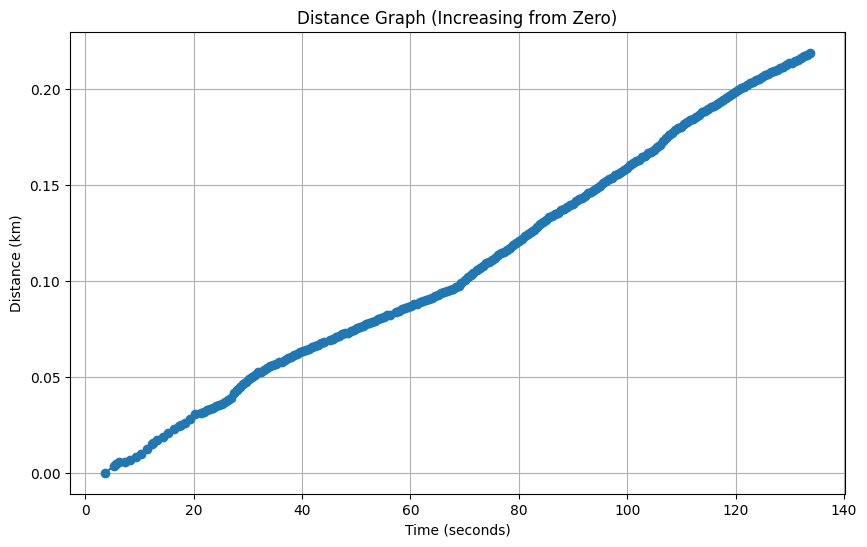

In [31]:
##Distance graph (increasing from zero)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distance graph
plt.plot(df['seconds_elapsed'], distances, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (km)')
plt.title('Distance Graph (Increasing from Zero)')

# Show the plot
plt.grid(True)
plt.show()


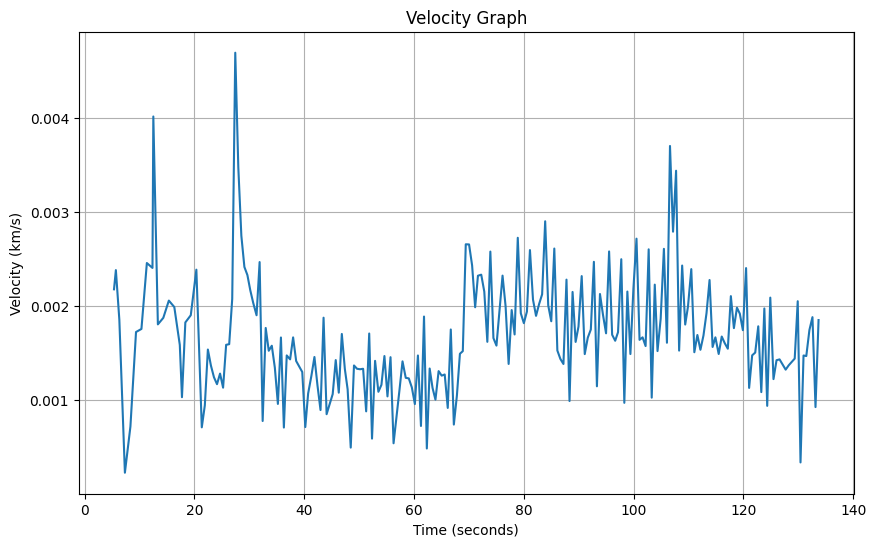

In [76]:
##Velocity graph (calculated from coordinates)

# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees). 
    """
    # Convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    r = 6371
    distance = r * c
    return distance

# Function to calculate velocity
def calculate_velocity(distance, time_diff):
    """
    Calculate velocity given distance and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return distance / time_diff

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')

# Initialize lists to store velocities and time differences
velocities = []
time_diffs = []

# Calculate velocities based on coordinates
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    time_diff = df.loc[i, 'seconds_elapsed'] - df.loc[i - 1, 'seconds_elapsed']
    velocity = calculate_velocity(distance, time_diff)
    velocities.append(velocity)
    time_diffs.append(time_diff)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the velocity graph
plt.plot(df['seconds_elapsed'][1:], velocities, linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity Graph')

# Show the plot
plt.grid(True)
plt.show()


In [77]:
##Acceleration graph (observed [three components] and calculated from speed [one component]).
##Note that these will be very different from each other!

#Read data
df = pd.read_csv('Acceleration_data.csv')
df.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


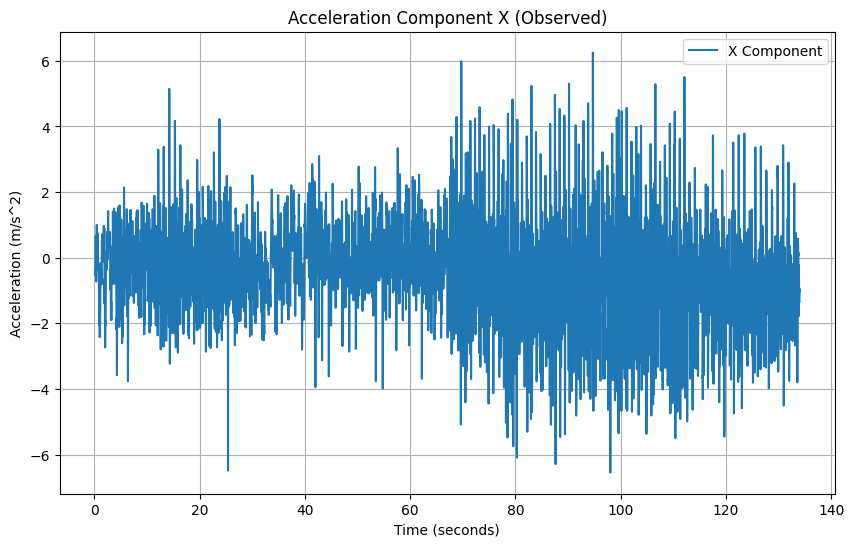

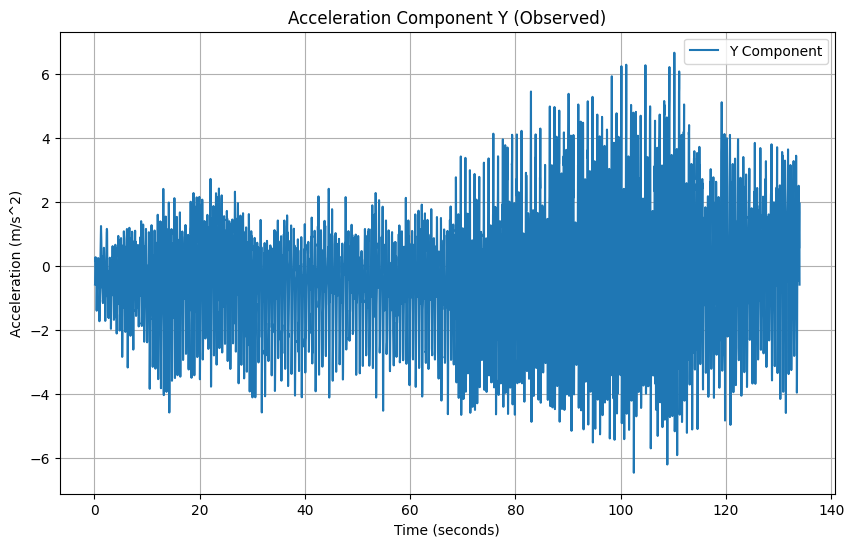

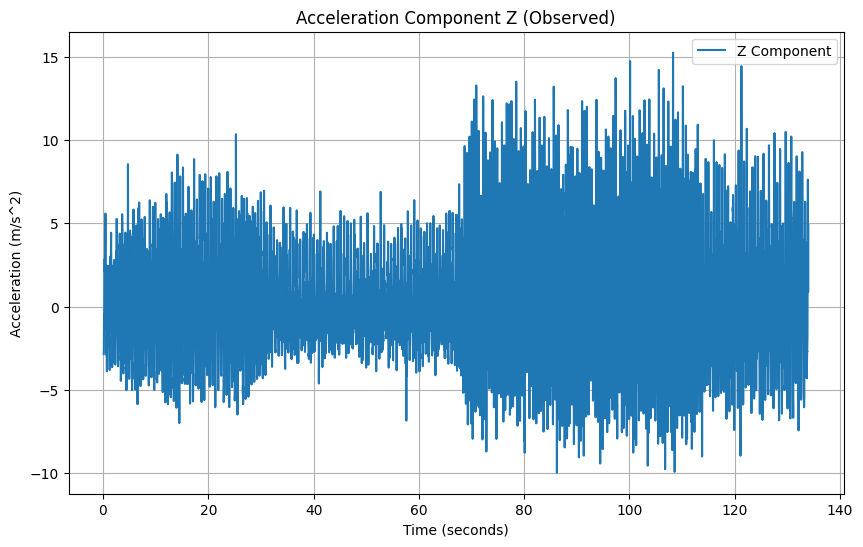

In [78]:
##Acceleration graph (observed [three components])

# Plot the x component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['x'], label='X Component', linestyle='-', )
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component X (Observed)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the y component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['y'], label='Y Component', linestyle='-')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component Y (Observed)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the z component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['z'], label='Z Component', linestyle='-')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component Z (Observed)')
plt.legend()
plt.grid(True)
plt.show()




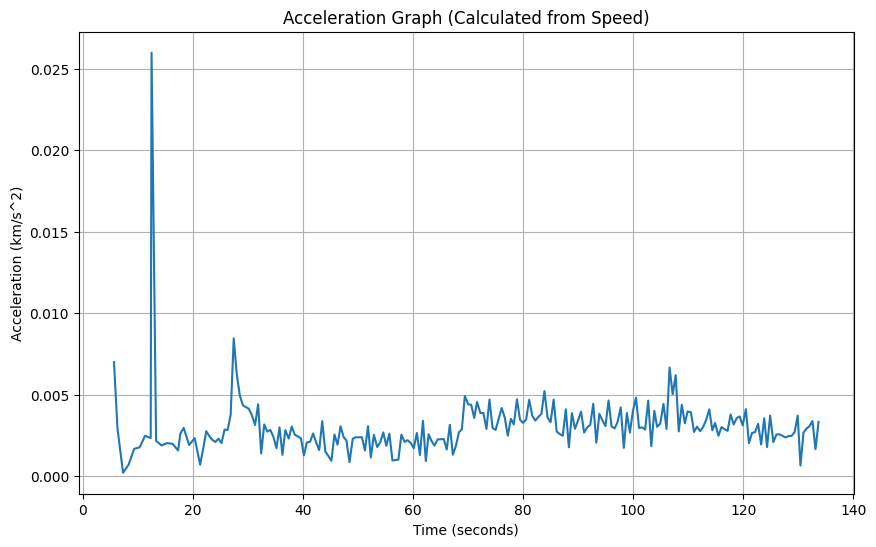

In [79]:
##Acceleration graph (calculated from speed [one components])

# Function to calculate velocity
def calculate_velocity(distance, time_diff):
    """
    Calculate velocity given distance and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return distance / time_diff
    
# Function to calculate acceleration
def calculate_acceleration(velocity, time_diff):
    """
    Calculate acceleration given velocity and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return (velocity - 0) / time_diff
    
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')

# Initialize lists to store velocities and time differences
velocities = []
time_diffs = []

# Calculate velocities based on coordinates
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    time_diff = df.loc[i, 'seconds_elapsed'] - df.loc[i - 1, 'seconds_elapsed']
    velocity = calculate_velocity(distance, time_diff)
    velocities.append(velocity)
    time_diffs.append(time_diff)

# Initialize lists to store accelerations and time differences
accelerations = []
time_diffs2 = []

# Calculate accelerations based on velocities
for i in range(1, len(velocities)):
    velocity1 = velocities[i - 1]
    velocity2 = velocities[i]
    time_diff2 = time_diffs[i]
    acceleration = calculate_acceleration(velocity2, time_diff2)
    accelerations.append(acceleration)
    time_diffs2.append(time_diff2)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the acceleration graph
plt.plot(df['seconds_elapsed'][2:], accelerations, linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (km/s^2)')
plt.title('Acceleration Graph (Calculated from Speed)')
plt.grid(True)
plt.show()



In [92]:
##Average speed as a number

import pandas as pd
import numpy as np

# Read the GPS data
gps_df = pd.read_csv('GPS_data.csv')

# Remove rows with missing or invalid longitude and latitude values
gps_df = gps_df.dropna(subset=['longitude', 'latitude'])

# Calculate distance between consecutive points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lon1_rad, lat1_rad = np.radians(lon1), np.radians(lat1)
    lon2_rad, lat2_rad = np.radians(lon2), np.radians(lat2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

gps_df['distance'] = haversine(gps_df['longitude'].shift(), gps_df['latitude'].shift(), gps_df['longitude'], gps_df['latitude'])

# Calculate time differences for GPS data
gps_df['time_diff'] = gps_df['seconds_elapsed'].diff().fillna(0)

# Calculate total distance and total time
total_distance = gps_df['distance'].sum()  # in kilometers
total_time = gps_df['time_diff'].sum() / 3600  # convert seconds to hours

# Calculate average speed
average_speed = total_distance / total_time  # in kilometers per hour (km/h)

# Calculate acceleration (change in speed / change in time)
gps_df['speed'] = gps_df['distance'] / gps_df['time_diff']  # Calculate speed
gps_df['acceleration'] = gps_df['speed'].diff() / gps_df['time_diff']  # Calculate acceleration

print("Total Distance Traveled:", total_distance, "kilometers")
print("Total Time Elapsed:", total_time, "hours or ", total_time * 3600, "seconds")
print("Average Speed:", average_speed, "kilometers per hour (km/h)")
print("Acceleration:", gps_df['acceleration'].mean(), "kilometers per hour squared (km/h^2)")



Total Distance Traveled: 0.21870509689541065 kilometers
Total Time Elapsed: 0.03610835578070746 hours or  129.99008081054686 seconds
Average Speed: 6.056910988239012 kilometers per hour (km/h)
Acceleration: 3.1671135602681206e-05 kilometers per hour squared (km/h^2)


In [87]:
##Traveled distance as a number

# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees). 
    """
    # Convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    r = 6371
    km = r * c
    return km


# Initialize the distances list with the starting distance (zero)
distances = [0]

# Calculate distances based on latitude and longitude
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    # Accumulate distances to create a cumulative distance graph
    distances.append(distances[-1] + distance)

# Print the final calculated distance
print(f"Traveled distance: {distances[-1]} kilometers")

Traveled distance: 0.21870509689541065 kilometers


In [88]:
##The number of steps 

import subprocess

# Specify the package you want to install
package_name = 'scipy'

# Run the pip install command
subprocess.check_call(['pip', 'install', package_name])


0

In [13]:
#Define the filter functions
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #Get the filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The number of steps is 256


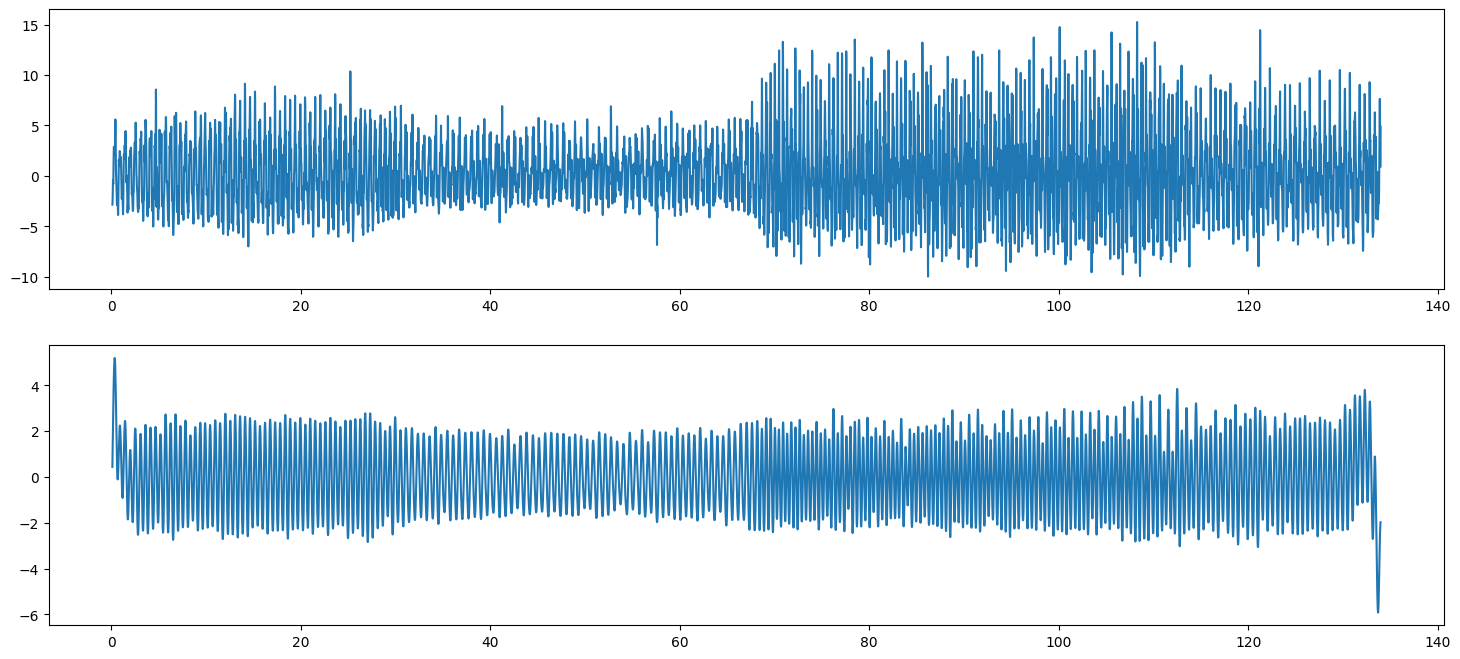

In [14]:
#filter the data
noisy_signal = df['z']
time = df['seconds_elapsed']
order = 2
dt = (time[len(time) - 1] - time[0]) / len(time)  # Time difference between consecutive observation, also called sampling interval

fs = 1/dt  # Sampling rate
nyq = 0.5 * fs  # Nyquist frequency
cutoff_H = 1/5  # Highpass cut-off
cutoff_L = 1/0.5  # Lowpass cut-off
# after this filtering, we'll have only frequencies from 1/40 to 1/5 in the data

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)  # Filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order)  # Filter out low frequencies

plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
plt.plot(time, noisy_signal)
plt.subplot(2, 1, 2)
plt.plot(time, final_signal)

stepdata = final_signal
steps = 0

for i in range(1, stepdata.shape[0]):
    if stepdata[i-1] >= 0 and stepdata[i] < 0:
        steps += 1
        
print('The number of steps is', steps)

In [96]:
import pandas as pd
import numpy as np

# Read the Acceleration data
acceleration_df = pd.read_csv('Acceleration_data.csv')

# Calculate the magnitude of acceleration
acceleration_df['magnitude'] = np.sqrt(acceleration_df['x']**2 + acceleration_df['y']**2 + acceleration_df['z']**2)

# Calculate time differences
acceleration_df['time_diff'] = acceleration_df['seconds_elapsed'].diff().fillna(0)

# Calculate acceleration (change in magnitude of acceleration / change in time)
acceleration_df['acceleration'] = acceleration_df['magnitude'].diff() / acceleration_df['time_diff']

# Calculate average acceleration
average_acceleration = acceleration_df['acceleration'].mean()

print("Average Acceleration:", average_acceleration / 1000, "km/h^2")



Average Acceleration: 1.7625656539372755e-05 km/h^2
